In [50]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np


In [51]:
iris= load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['target']= iris.target

In [52]:
df['species']= pd.Categorical.from_codes(iris.target, iris.target_names)

In [53]:
from sklearn.model_selection import train_test_split

data_Tr, data_Te, target_Tr, target_Te = train_test_split(df.iloc[:,[0,1,2,3]], df.target
                                 , random_state=0
                                 , train_size=0.75)

In [54]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_importances_',
 'fit',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_d

In [70]:
clf = RandomForestClassifier(n_estimators= 200, n_jobs=2, random_state=0)
clf.fit(data_Tr,target_Tr)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
result=clf.predict(data_Te)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

### Paramètre de RandomForestClassifier
<ul><li>Bootstrap: Paramettre qui permet de n'utiliser qu'une partie du dataset fixer par le max_samples.</li>
    <li>n_estimators: Le nombre d'arbre dans notre forêt</li>
    <li>n_jobs: Le nombre de run en parallèle de l'algotithme</li>
    </ul>


In [72]:
accuracy=accuracy_score(result, target_Te)
recall= recall_score(result, target_Te, average=None)
precision= precision_score(result, target_Te, average=None)
F1= f1_score(result, target_Te, average=None)

print("R =", recall) # précision de prédiction des valeur Positive correctement prédit
#par rapport à l'ensemble des vrais valeurs
print("A =", accuracy) # Précision sur l'ensemble des bon résultat (True positive and True neg) par rapport
#A l'ensmble des valeurs.
print("P =", precision)# Précision de prédiction des valeurs Positive par rapport à tout les donnée prédite 
#postif. 
print('F1 =', F1) #Valeur qui fait la balance entre recall et precision pour avoir une valeur qui maximise les 
#deux valeurs

R = [1.  1.  0.9]
A = 0.9736842105263158
P = [1.     0.9375 1.    ]
F1 = [1.         0.96774194 0.94736842]


In [73]:
conf= confusion_matrix(target_Te, result)
conf

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

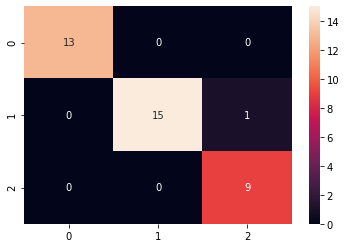

In [74]:
import seaborn as sns
sns.heatmap(conf, annot=True)

In [61]:
clf.feature_importances_

array([0.10145433, 0.03411675, 0.46927873, 0.39515019])

In [62]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.469279
petal width (cm)     0.395150
sepal length (cm)    0.101454
sepal width (cm)     0.034117
dtype: float64

In [63]:
type(feature_imp)

pandas.core.series.Series

Text(0.5, 1.0, "Visualisation de l'importance des features")

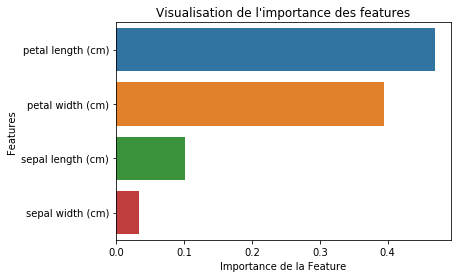

In [64]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Importance de la Feature")
plt.ylabel("Features")
plt.title("Visualisation de l'importance des features")

In [65]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


On peut plot des itérations des arbres généré par le Random Forest

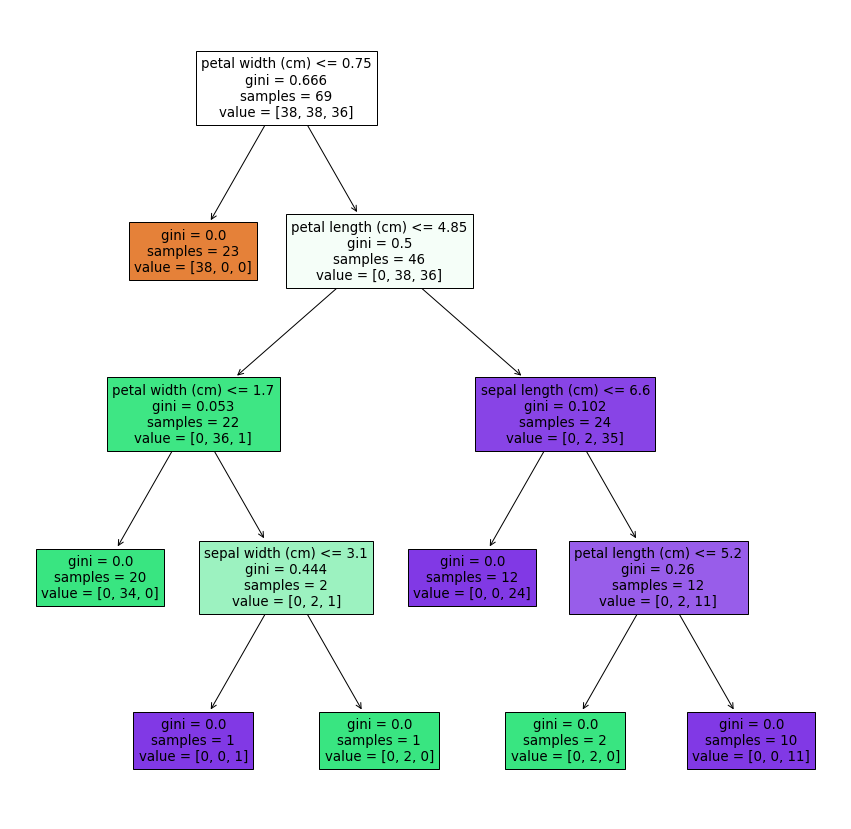

In [66]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=[15,15])
tree.plot_tree(clf[0], filled=True, 
               feature_names=df.iloc[:,[0,1,2,3]].columns)
plt.show()

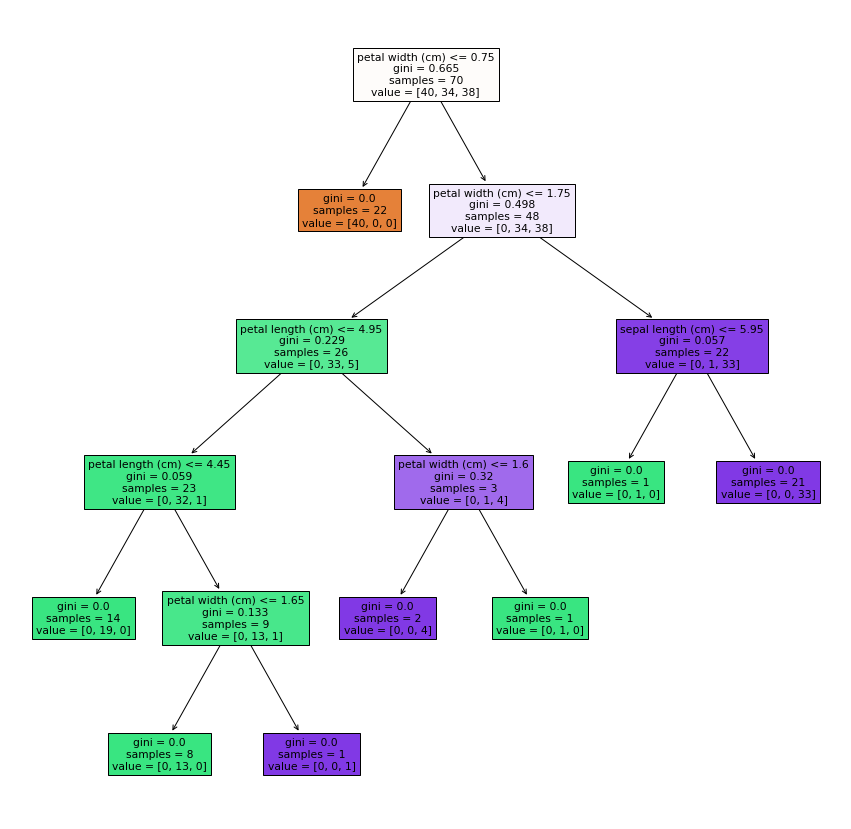

In [67]:
plt.figure(figsize=[15,15])
tree.plot_tree(clf[1], filled=True, 
               feature_names=df.iloc[:,[0,1,2,3]].columns)
plt.show()

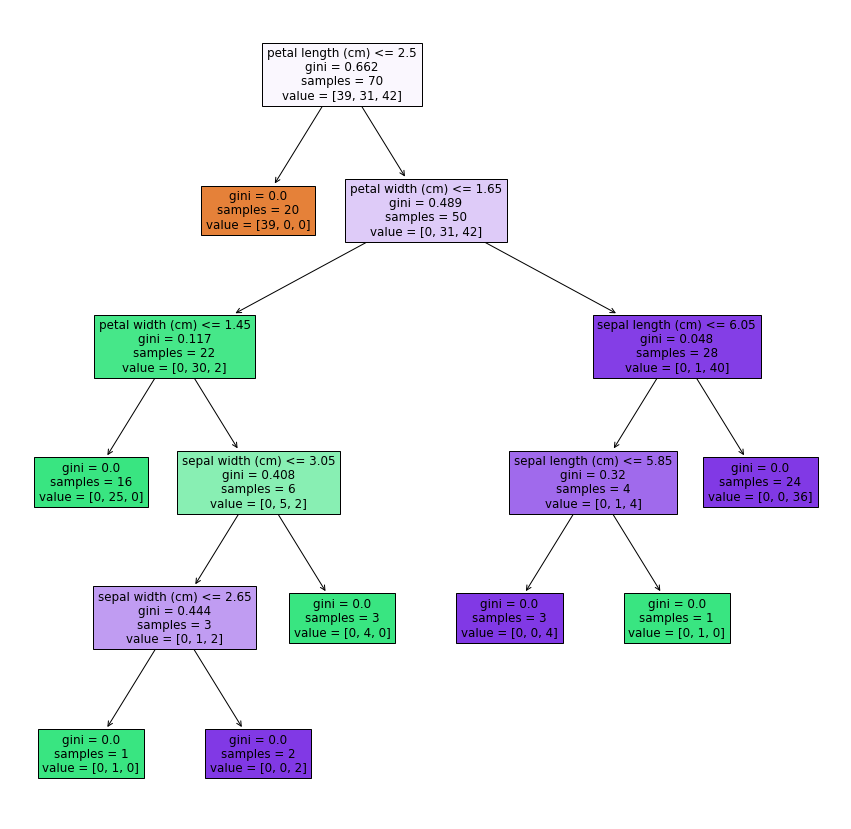

In [68]:
plt.figure(figsize=[15,15])
tree.plot_tree(clf
               [99], filled=True, 
               feature_names=df.iloc[:,[0,1,2,3]].columns)
plt.show()

In [ ]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [75]:
clf.n_features_

4